# [E-02] 사이킷 런 데이터 셋으로 여러가지 모델 돌려보기

이번에는 사이킷 런에서 제공하는 3가지 데이터 셋을 5가지의 모델로 결과를 예측해보고 비교하려 한다. 
시작하기 앞서 어떤 데이터와 모델을 사용할 것인지 정리한다. 

### 학습에 사용할 데이터

1. 손글씨 데이터
2. 와인 데이터
3. 유방암 데이터

### 학습에 사용할 모델(알고리즘)

1. Decision Tree
2. Random Forest 
3. SVM 
4. SGD Classifier
5. Logistic Regression 

### 목표

#### 1. 손글씨 데이터

0부터 9까지 적힌 손글씨 이미지 데이터를 모델에게 학습시켜 0부터 9까지 인식하도록 한다.

#### 2. 와인 데이터

와인의 화학성분 데이터를 모델에게 학습시켜 특정 성분의 와인이 무엇인지 예측하도록 한다.

#### 3. 유방암 데이터

환자의 검진 결과 데이터를 학습시켜 유방암을 진단하도록 한다. 

## 1. 손글씨 데이터 분류

### 필요한 모듈 호출하기

In [1]:
# 필요한 모듈 import
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# 모델 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 손글씨 데이터 준비

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
digits_data = digits.data
digits_label = digits.target

### 객체의 변수와 메소드 확인

In [3]:
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


### Description 출력하여 데이터의 정보 확인

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

데이터 정보
- 1797개의 Data
- 64px 이미지 데이터(8x8)
- 10개의 Class
- 결측치 None

### 데이터의 수 확인

In [5]:
print(digits_data.shape)
print(digits_label.shape)

(1797, 64)
(1797,)


### 데이터 라벨 확인

In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 인덱스를 통해 데이터 샘플 확인

In [7]:
digits_data[0] 

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

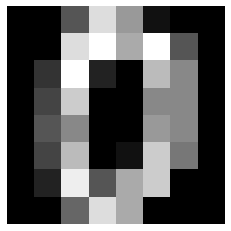

In [8]:
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

### 데이터 train, test 셋으로 분리

In [9]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print(len(X_train), len(X_test), len(y_train), len(y_test))

1437 360 1437 360


### 데이터 학습 Decision Tree

In [10]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

digit_acc={}   
digit_acc['Decision Tree'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



### Random Forest

In [11]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

digit_acc['Random Forest'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



### SVM Model

In [12]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

digit_acc['SVM'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### SGD Classifier

In [13]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

digit_acc['SGD Classifier'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.87      0.98      0.92        42
           2       1.00      1.00      1.00        40
           3       1.00      0.88      0.94        34
           4       1.00      0.97      0.99        37
           5       0.97      1.00      0.98        28
           6       0.96      0.93      0.95        28
           7       0.97      0.97      0.97        33
           8       0.83      0.93      0.88        43
           9       0.96      0.81      0.88        32

    accuracy                           0.95       360
   macro avg       0.96      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



### Logistic Regression Model

In [14]:
logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

digit_acc['Logistic Regression'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        37
           5       0.79      0.96      0.87        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       0.92      0.81      0.86        43
           9       0.97      0.88      0.92        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



### 모델의 성능 평가

In [15]:
for i in digit_acc.items():
    print("{0:<20} : {1}".format(i[0],i[1]))

Decision Tree        : 0.8555555555555555
Random Forest        : 0.9638888888888889
SVM                  : 0.9888888888888889
SGD Classifier       : 0.95
Logistic Regression  : 0.95


## 2. 와인 데이터 분류

### 와인 데이터 준비

In [16]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_data = wine.data
wine_label = wine.target

### 객체의 변수와 메소드 확인

In [17]:
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


### Description 출력하여 데이터의 정보 확인

In [18]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

- 178개의 Data
- 13개의 Feature
- 3개의 Class
- 결측치 None

### 데이터의 수 확인

In [19]:
print(wine_data.shape)
print(wine_label.shape)

(178, 13)
(178,)


### Features 확인

In [20]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


### 데이터 라벨 확인

In [21]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### 인덱스를 통해 데이터 샘플 확인

In [22]:
wine_data[0] 

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

### 데이터 train, test 셋으로 분리

In [23]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print(len(X_train), len(X_test), len(y_train), len(y_test))

142 36 142 36


### 데이터 학습 Decision Tree

In [24]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

wine_acc={}   
wine_acc['Decision Tree'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



### Random Forest

In [25]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

wine_acc['Random Forest'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### SVM Model

In [26]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

wine_acc['SVM'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



### SGD Classifier

In [27]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

wine_acc['SGD Classifier'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.55      0.94      0.70        17
           2       0.00      0.00      0.00        12

    accuracy                           0.61        36
   macro avg       0.47      0.60      0.52        36
weighted avg       0.43      0.61      0.50        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression Model

In [28]:
logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

wine_acc['Logistic Regression'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



### 모델의 성능 평가

In [29]:
for i in wine_acc.items():
    print("{0:<20} : {1}".format(i[0],i[1]))

Decision Tree        : 0.9444444444444444
Random Forest        : 1.0
SVM                  : 0.6111111111111112
SGD Classifier       : 0.6111111111111112
Logistic Regression  : 0.9722222222222222


## 3. 유방암 진단

### 진단 데이터 준비

In [30]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
breast_cancer_data = breast_cancer.data
breast_cancer_label = breast_cancer.target

### 객체의 변수와 메소드 확인

In [31]:
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Description 출력하여 데이터의 정보 확인

In [32]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

- 569개의 데이터
- 30개의 Features
- WDBC-Malignant(악성), WDBC-Benign(양성) 2 개의 Class
- 결측치 None

### 데이터의 수 확인

In [33]:
print(breast_cancer_data.shape)
print(breast_cancer_label.shape)

(569, 30)
(569,)


### Features 확인

In [34]:
print(breast_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### 데이터 라벨 확인

In [35]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

### 인덱스를 통해 데이터 샘플 확인

In [36]:
breast_cancer_data[0] 

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

### 데이터 train, test 셋으로 분리

In [37]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print(len(X_train), len(X_test), len(y_train), len(y_test))

455 114 455 114


### 데이터 학습 Decision Tree

In [38]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

breast_cancer_acc={}   # 유방암 데이터의 Accuracy Dict
breast_cancer_acc['Decision Tree'] = accuracy_score(y_test, y_pred)

breast_cancer_mat={} # 유방암 데이터의 Predicted Class Dict
breast_cancer_mat['Decision Tree'] = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114

[[33  7]
 [ 3 71]]


### Random Forest

In [39]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

breast_cancer_acc['Random Forest'] = accuracy_score(y_test, y_pred)
breast_cancer_mat['Random Forest'] = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

[[40  0]
 [ 0 74]]


### SVM Model

In [40]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

breast_cancer_acc['SVM'] = accuracy_score(y_test, y_pred)
breast_cancer_mat['SVM'] = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114

[[29 11]
 [ 0 74]]


### SGD Classifier

In [41]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

breast_cancer_acc['SGD Classifier'] = accuracy_score(y_test, y_pred)
breast_cancer_mat['SGD Classifier'] = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77        40
           1       0.83      1.00      0.91        74

    accuracy                           0.87       114
   macro avg       0.92      0.81      0.84       114
weighted avg       0.89      0.87      0.86       114

[[25 15]
 [ 0 74]]


### Logistic Regression Model

In [42]:
logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

breast_cancer_acc['Logistic Regression'] = accuracy_score(y_test, y_pred)
breast_cancer_mat['Logistic Regression'] = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

[[34  6]
 [ 0 74]]


### 모델의 성능 평가

In [43]:
for i in breast_cancer_acc.items():
    print("{0:<20} : {1}".format(i[0],i[1]))

Decision Tree        : 0.9122807017543859
Random Forest        : 1.0
SVM                  : 0.9035087719298246
SGD Classifier       : 0.868421052631579
Logistic Regression  : 0.9473684210526315


앞서 두 데이터는 모델의 성능평가를 분류 정확도 수치인 Accuracy late로 판별하였다.<br> 그러나 진단 모델의 경우 단 한 건의 오진도 피해야 한다. <br>따라서 앞 모델의 평가지표와는 다르게 얼마나 틀리지 않았는지가 상대적으로 더욱 중요하다. <br>예를 들어 건강한 사람에게 유방암 진단을 내리는 것을 어느 정도 감수하더라도 실제 유방암 환자에게 음성 진단을 내리는 경우를 꼭 피해야 한다. <br>따라서 이번 성능평가에서는 Accuracy late로 판별하지 않고 오차행렬을 통해 모델의 성능을 평가한다. 

### 오차행렬 표현법을 통한 모델의 성능평가

sklearn에서 제공하는 plot_confusion_matrix를 이용하여 시각화 하였다.

### Decision Tree의 오차행렬

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


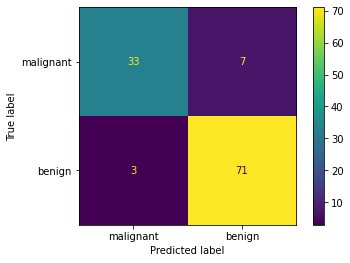

In [44]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(decision_tree, X_test, y_test, values_format='d',display_labels=breast_cancer.target_names)

- TP - 실제 환자에게 양성 판정 : 33
- FN - 실제 환자에게 음성 판정 : 7
- FP - 건강한 사람에게 양성 판정 : 3
- TN - 건강한 사람에게 음성 판정 : 71

### Random Forest의 오차행렬

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


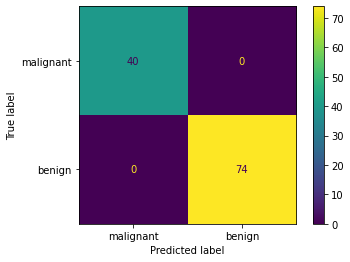

In [45]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(random_forest, X_test, y_test, values_format='d',display_labels=breast_cancer.target_names)

- TP - 실제 환자에게 양성 판정 : 40
- FN - 실제 환자에게 음성 판정 : 0
- FP - 건강한 사람에게 양성 판정 : 0
- TN - 건강한 사람에게 음성 판정 : 74

### SVM의 오차행렬

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


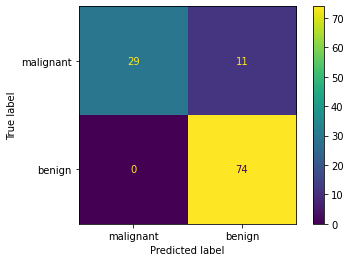

In [46]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svm_model, X_test, y_test, values_format='d',display_labels=breast_cancer.target_names)

- TP - 실제 환자에게 양성 판정 : 29
- FN - 실제 환자에게 음성 판정 : 11
- FP - 건강한 사람에게 양성 판정 : 0
- TN - 건강한 사람에게 음성 판정 : 74

### SGD의 오차행렬

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


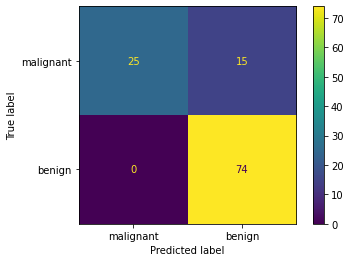

In [47]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(sgd_model, X_test, y_test, values_format='d',display_labels=breast_cancer.target_names)

- TP - 실제 환자에게 양성 판정 : 25
- FN - 실제 환자에게 음성 판정 : 15
- FP - 건강한 사람에게 양성 판정 : 0
- TN - 건강한 사람에게 음성 판정 : 74

### Logistic Model의 오차행렬

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


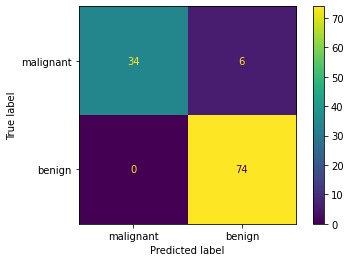

In [48]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logistic_model, X_test, y_test, values_format='d',display_labels=breast_cancer.target_names)

- TP - 실제 환자에게 양성 판정 : 34
- FN - 실제 환자에게 음성 판정 : 6
- FP - 건강한 사람에게 양성 판정 : 0
- TN - 건강한 사람에게 음성 판정 : 74

## 결론

### 손글씨 데이터 분류

가장 높은 Accuracy를 기록한 모델은 SVM 모델로 98.88%의 정확도를 기록하였다.

### 와인 데이터 분류

가장 높은 Accuracy를 기록한 모델은 Random Forest 모델로 100.00%의 정확도를 기록하였다.

### 유방암 데이터를 통한 악성 유방암 진단

가장 높은 Recall 재현율을 기록한 모델은 Random Forest 모델로 100.00%를 기록하였다.<br>
또한 오차행렬 지표에서 오진을 한 건도 기록하지 않아 가장 안정적인 모델이었다. 

## 후기

여러가지 모델의 성능을 다양한 데이터로 학습시키고 비교하며 여러가지를 배울 수 있었다. 데이터의 전처리와 모델에게 적절하게 학습을 시키는 과정은 늘 중요하다는 사실을 배웠다. 또한 학습 후 결과로 나온 수치를 절대적으로 신뢰할 것이 아니라 상황에 맞게 성능을 평가해야하며 그 지표에도 여러가지 기준과 종류가 있다는 것을 알게되었다. 특히 이번 실습에서 배웠던 가장 중요한 점은 데이터의 준비와 모델의 설계, 학습, 성능을 평가하는 과정 모두 중요하지만 해결하고자 하는 문제가 무엇인지를 제대로 이해해야 올바른 결론에 이를 수 있다는 것이다.